In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(rc = {'figure.figsize': (20,8)}, style = 'whitegrid', palette = 'Set2')

In [78]:


data = pd.read_csv("AB_NYC_2019.csv")
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [79]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [80]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [81]:
data.dropna(inplace = True)

In [82]:
data.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38821 entries, 0 to 38820
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           38821 non-null  int64  
 1   id                              38821 non-null  int64  
 2   name                            38821 non-null  object 
 3   host_id                         38821 non-null  int64  
 4   host_name                       38821 non-null  object 
 5   neighbourhood_group             38821 non-null  object 
 6   neighbourhood                   38821 non-null  object 
 7   latitude                        38821 non-null  float64
 8   longitude                       38821 non-null  float64
 9   room_type                       38821 non-null  object 
 10  price                           38821 non-null  int64  
 11  minimum_nights                  38821 non-null  int64  
 12  number_of_reviews               

In [83]:
data['last_review'] = data['last_review'].astype('datetime64[ns]')
data['last_review_day'] = data['last_review'].dt.day
data['last_review_month'] = data['last_review'].dt.month
data['last_review_year'] = data['last_review'].dt.year

In [84]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,19,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21,5,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5,7,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,19,11,2018
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,22,6,2019


In [85]:
import calendar
data['last_review_month'] = data['last_review_month'].apply(lambda x: calendar.month_abbr[x])

In [86]:
for i in data.columns:
    if data[i].dtype == object:
        if len(data[i].unique()) < 1000:
            print("The unique values present in", i ,"are: \n\n{}".
                  format(data[i].unique()),'\n')

The unique values present in neighbourhood_group are: 

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 

The unique values present in neighbourhood are: 

['Kensington' 'Midtown' 'Clinton Hill' 'East Harlem' 'Murray Hill'
 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side' 'Chinatown'
 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene' 'Chelsea'
 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood' 'East Village'
 'Harlem' 'Greenpoint' 'Bushwick' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Flatbush' 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands'
 'Cobble Hill' 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George'
 'Highbridge' 'Financial District' 'Ridgewood' 'Morningside Heights'
 'Jamaica' 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsv

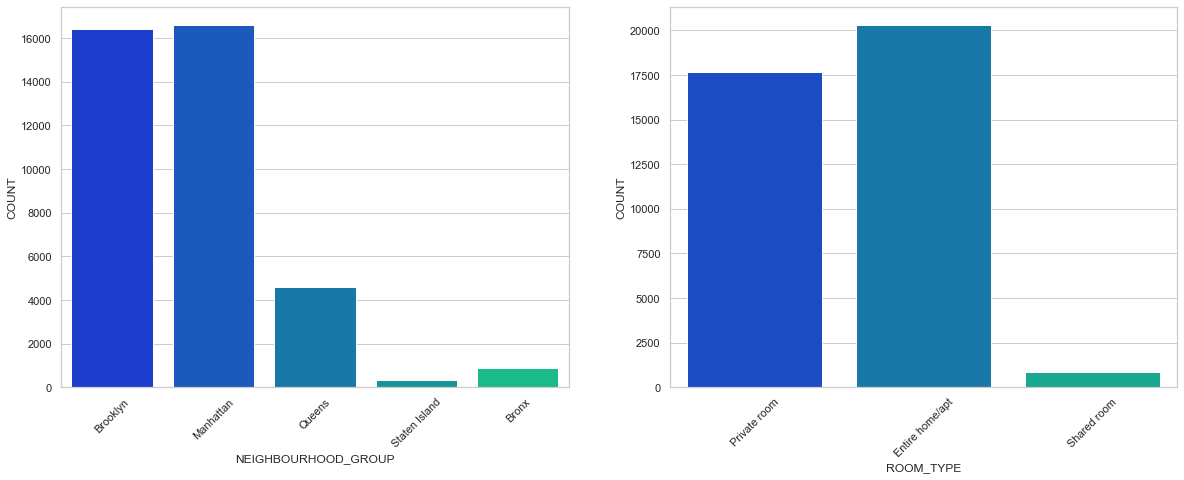

In [87]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = data["neighbourhood_group"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(x = data["room_type"], palette = "winter")
plt.xlabel("ROOM_TYPE", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [222]:
data_bronx = data[data["neighbourhood_group"] == "Bronx"]

In [225]:
data_test = pd.DataFrame(data_bronx.groupby("neighbourhood")["price"].mean())

In [227]:
data_test["avg_reviews"] = pd.DataFrame(data_bronx.groupby("neighbourhood")["number_of_reviews"].mean())

In [229]:
data_test["count"] = pd.DataFrame(data_bronx.groupby("neighbourhood")["number_of_reviews"].count())

In [230]:
data_test

,price,avg_reviews,count
neighbourhood,,,
Allerton,90.594595,48.729730,37
Baychester,78.000000,51.666667,6
Belmont,79.450000,14.800000,20
Bronxdale,51.875000,28.625000,16
Castle Hill,74.000000,59.000000,2
City Island,94.266667,50.600000,15
Claremont Village,68.937500,21.875000,16
Clason Point,101.333333,17.555556,18
Co-op City,77.500000,17.000000,2


In [ ]:
data.to_csv('file_name.csv')

In [249]:
data_host = pd.DataFrame(data.groupby("host_id")["number_of_reviews"].mean())

In [250]:
data_host["count"] = pd.DataFrame(data.groupby("host_id")["calculated_host_listings_count"].count())

In [251]:
data_host["neighbourhood_group"] = pd.DataFrame(data.groupby("host_id")["neighbourhood_group"].unique())

In [252]:
data_host["host_name"] = pd.DataFrame(data.groupby("host_id")["host_name"].unique())

In [253]:
data_host_sort = data_host.sort_values(by=['number_of_reviews'], ascending=False).head(20)

In [254]:
data_host_sort

,number_of_reviews,count,neighbourhood_group,host_name
host_id,,,,
47621202,602.500000,2,[Queens],[Dona]
4734398,599.333333,3,[Manhattan],[Jj]
2369681,540.000000,1,[Manhattan],[Carol]
12949460,488.000000,1,[Brooklyn],[Asa]
792159,480.000000,1,[Brooklyn],[Wanda]
37312959,454.600000,5,[Queens],[Maya]
2321321,454.000000,1,[Queens],[Lloyd]
277379,448.500000,2,[Manhattan],[Agnes]
307962,441.000000,1,[Queens],[Dennis & Naoko]


In [255]:
data_host_sort.to_csv('best_host.csv')

In [256]:
data.to_csv('AB_NYC_2019_Updated.csv')